In [1]:
from matplotlib import pyplot as plt
from algs.utils import * 
from algs.algorithms import *
from scipy.optimize import minimize, Bounds

import numpy as np
%matplotlib inline

# Read A Matrix

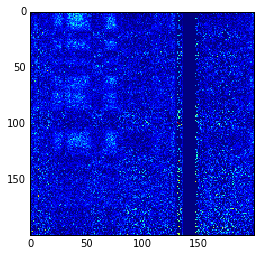

In [85]:
path = 'data/chr1_chr6.txt'
A = read_data(path, clean_nan = True)
A = A[100:300, 100:300] # subset for now. 

m, n = A.shape

plt.imshow(A, interpolation = 'nearest')

In [86]:
k = 30

# LAS

In [101]:
res = LAS(A, k) # compute LAS
res['val']

4.0905378751666666

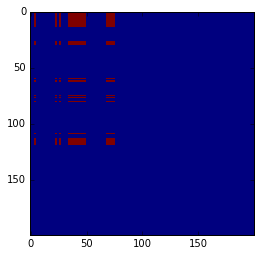

In [102]:
plt.imshow(inclusion_matrix(A, res['ix']), interpolation = 'nearest')

# IGP

In [89]:
res = IGP(A, k)
res['val'] # get the value (average)

2.2400738409222223

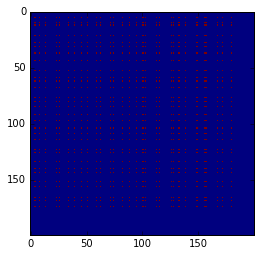

In [90]:
plt.imshow(inclusion_matrix(A, res['ix']), interpolation = 'nearest')

# SLSQP

In [103]:
z = continuous_SLSQP(A, k, print_obj = False)
z['val']

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4.09017139279
            Iterations: 68
            Function evaluations: 67
            Gradient evaluations: 67


4.090172732488889

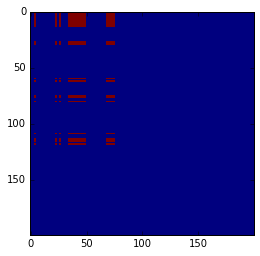

In [105]:
plt.imshow(np.outer(z['x'], z['y']), interpolation = 'nearest')